## Self-Attention Module

The **Self-Attention** module, also known as the **Scaled Dot-Product Attention**, is a key component in the Transformer model proposed in the paper "Attention is All You Need". 

The main idea behind self-attention is to compute a weighted sum of all input values, where the weights are determined by the input itself. This allows the model to focus on different parts of the input for each output, hence the term "attention".

Mathematically, the self-attention can be described as follows:

Given a set of input vectors $Q$ (query), $K$ (key), and $V$ (value), we first compute the dot product of $Q$ and $K$, and then apply a softmax function to obtain the weights:

$$
\text{Attention}(Q, K, V) = \text{softmax}\left(\frac{QK^T}{\sqrt{d_k}}\right)V
$$

Here, $d_k$ is the dimension of the key vectors which is used for scaling down the dot product. This is especially important when the values of the dot product are large, as it helps to maintain stable gradients.

The output of the self-attention module is a weighted sum of the value vectors, where the weights are determined by the query and key vectors. This allows the model to focus on different parts of the input for each output, hence the term "attention".

<div style="text-align: center">
    <img src="imgs/attention.webp" />
</div>

### Query, Key, and Value in Self-Attention

In the **Self-Attention** module, the concepts of **Query (Q)**, **Key (K)**, and **Value (V)** are used. These are abstract concepts that can be thought of as the roles that different parts of the input data play in the computation of the attention weights and the final output.

- **Query (Q)**: The query is a representation of the current item. It's used to score each key, determining how much focus to place on each value.

- **Key (K)**: The key is a representation that corresponds to a particular value. It's compared with the query to compute the attention scores.

- **Value (V)**: The value is the representation that is actually used to compute the output. It's weighted by the attention scores to compute the final output.

In the context of a Transformer model, for example, the query might be a representation of the current word being processed, the key might be a representation of every other word in the sentence, and the value might also be a representation of every other word in the sentence.

The attention scores are computed by taking the dot product of the query and each key, followed by a softmax operation to obtain probabilities. These scores determine how much each value should contribute to the final output.

The use of separate query, key, and value representations allows the model to dynamically focus on different parts of the input for each item in the output, which is a powerful feature of the Self-Attention mechanism.

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Generating Key, Query, and Value Matrices

We will generate three matrices: **Key (K)**, **Query (Q)**, and **Value (V)**. Each of these matrices will have a shape of (3, 4), corresponding to a sequence length of 3 and an embedding dimension of 4. We will use random values to fill these matrices for demonstration purposes.

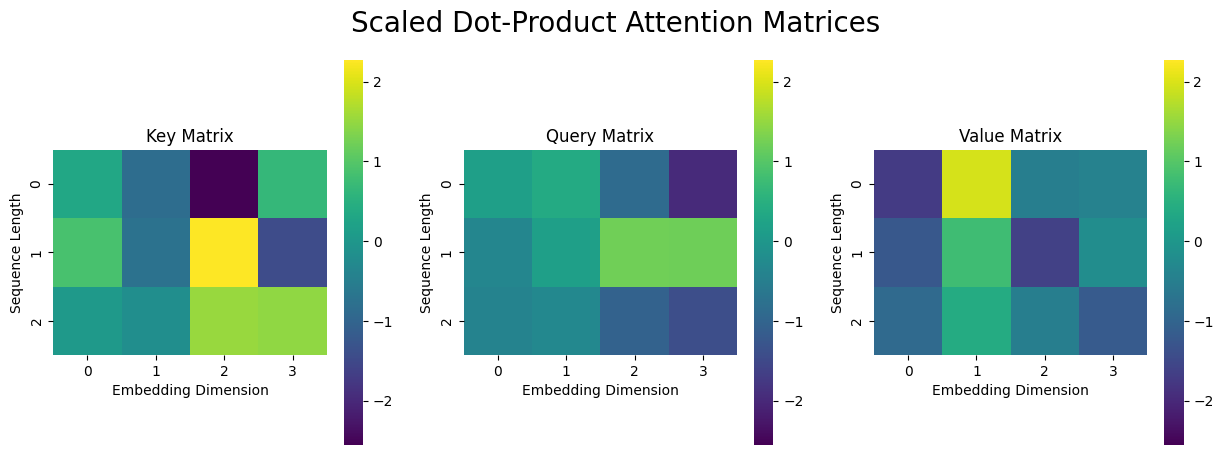

In [15]:
seq_len = 3
embed_dim = 4

# Because this is a simple demo, we generate the Key, Query and Value matrices randomly
# In practice, Key, Query and Value matrices are calculated from the input sequence using a set of linear layers
K = np.random.randn(seq_len, embed_dim)
Q = np.random.randn(seq_len, embed_dim)
V = np.random.randn(seq_len, embed_dim)

# Find the min and max values for scaling
vmin = min(K.min(), Q.min(), V.min())
vmax = max(K.max(), Q.max(), V.max())

# Create a figure and subplots
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Set the title for the figure
fig.suptitle('Scaled Dot-Product Attention Matrices', fontsize=20)

# Set x and y axis equal scales
axs[0].set_aspect('equal')
axs[1].set_aspect('equal')
axs[2].set_aspect('equal')


# Plot the Key matrix
sns.heatmap(K, vmin=vmin, vmax=vmax, ax=axs[0], cmap='viridis')
axs[0].set_title('Key Matrix')
axs[0].set_xlabel('Embedding Dimension')
axs[0].set_ylabel('Sequence Length')

# Plot the Query matrix
sns.heatmap(Q, vmin=vmin, vmax=vmax, ax=axs[1], cmap='viridis')
axs[1].set_title('Query Matrix')
axs[1].set_xlabel('Embedding Dimension')
axs[1].set_ylabel('Sequence Length')

# Plot the Value matrix
sns.heatmap(V, vmin=vmin, vmax=vmax, ax=axs[2], cmap='viridis')
axs[2].set_title('Value Matrix')
axs[2].set_xlabel('Embedding Dimension')
axs[2].set_ylabel('Sequence Length')

# Display the plot
plt.show()

### Calculating the Energy

The **energy** in the Self-Attention mechanism is calculated as the dot product of the **Query (Q)** and **Key (K)** matrices, divided by the square root of the embedding dimension. This scaling factor is used to prevent the dot product from growing too large as the dimension increases. The energy is then normalized using the softmax function to get the attention weights.

Mathematically, the energy is calculated as follows:

$$
\text{Energy} = \frac{QK^T}{\sqrt{d_k}}
$$

The normalized energy (attention weights) is then calculated as:

$$
\text{Attention Weights} = \text{softmax}(\text{Energy})
$$

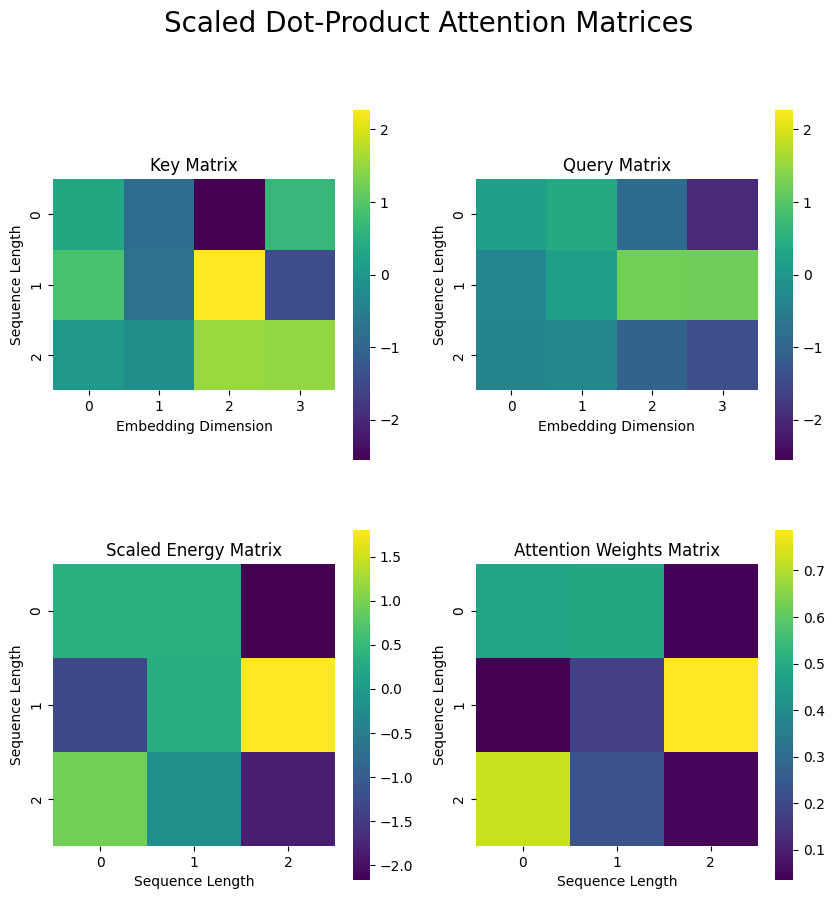

In [16]:
# Calculate the Energy matrix
Energy = np.dot(Q, K.T) / np.sqrt(embed_dim)

# Find the softmax of the Energy matrix
Attention_Weights = np.exp(Energy) / np.sum(np.exp(Energy), axis=1, keepdims=True)

# Find min and max values for scaling
vmin_1 = min(K.min(), Q.min())
vmax_1 = max(K.max(), Q.max())

# Create a figure and subplots
fig, axs = plt.subplots(2, 2, figsize=(10, 10))

# Set the title for the figure
fig.suptitle('Scaled Dot-Product Attention Matrices', fontsize=20)

# Set x and y axis equal scales
axs[0, 0].set_aspect('equal')
axs[0, 1].set_aspect('equal')
axs[1, 0].set_aspect('equal')
axs[1, 1].set_aspect('equal')

# Plot the Key matrix
sns.heatmap(K, cmap='viridis', ax=axs[0, 0], vmin=vmin, vmax=vmax)
axs[0, 0].set_title('Key Matrix')
axs[0, 0].set_xlabel('Embedding Dimension')
axs[0, 0].set_ylabel('Sequence Length')

# Plot the Query matrix
sns.heatmap(Q, cmap='viridis', ax=axs[0, 1], vmin=vmin, vmax=vmax)
axs[0, 1].set_title('Query Matrix')
axs[0, 1].set_xlabel('Embedding Dimension')
axs[0, 1].set_ylabel('Sequence Length')

# Plot the Energy matrix
sns.heatmap(Energy, cmap='viridis', ax=axs[1, 0])
axs[1, 0].set_title('Scaled Energy Matrix')
axs[1, 0].set_xlabel('Sequence Length')
axs[1, 0].set_ylabel('Sequence Length')

# Plot the Attention Weights matrix
sns.heatmap(Attention_Weights, cmap='viridis', ax=axs[1, 1])
axs[1, 1].set_title('Attention Weights Matrix')
axs[1, 1].set_xlabel('Sequence Length')
axs[1, 1].set_ylabel('Sequence Length')

# Display the plot
plt.show()

#### Meaning of the Dot Product of Energy and Value Matrix

The dot product of the **Energy (or Attention Weights)** and the **Value (V)** matrix in the context of the Self-Attention mechanism can be interpreted as a **weighted sum** of the value vectors. 

Each row in the Value matrix represents the value vector for a specific element in the input sequence. The Attention Weights determine how much each value vector contributes to the final output. 

If an element in the input sequence is highly relevant to the current context (as determined by the Query and Key), its corresponding attention weight will be high. Thus, its value vector will contribute more to the final output. Conversely, if an element is less relevant, its attention weight will be low, and it will contribute less to the output.

In essence, this operation allows the model to **focus** on different parts of the input sequence when producing each element in the output sequence, hence the term "attention". It's a way for the model to aggregate information from all parts of the input, weighted by their relevance.

### Masking in Self-Attention

In the **decoder** part of the Transformer model, a **mask** is applied to the self-attention mechanism to prevent it from looking at future tokens in the sequence. This is done because the decoder should only be allowed to attend to earlier positions in the output sequence while predicting the next word.

The mask is typically a matrix that has the same size as the attention matrix, and contains values of 0 for positions that should be attended to, and -inf (or a very large negative number) for positions that should be masked. When this mask is added to the attention scores before the softmax operation, it effectively nullifies the influence of the masked positions.

/var/folders/lz/hfndbp196sg6l0ytqv0mpp700000gn/T/ipykernel_89002/2444104110.py:2: RuntimeWarning: invalid value encountered in multiply
  mask = np.triu(np.ones((seq_len, seq_len)), k=1) * -np.inf


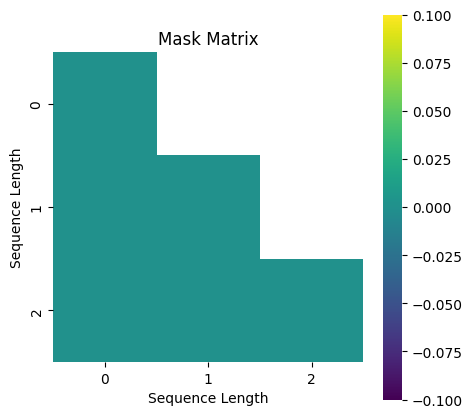

In [17]:
# Create a mask matrix
mask = np.triu(np.ones((seq_len, seq_len)), k=1) * -np.inf
mask[np.triu(np.ones((seq_len, seq_len)), k=1) == 0] = 0

# Create a figure and subplot
fig, ax = plt.subplots(figsize=(5, 5))

# Set the x and y axis equal scales
ax.set_aspect('equal')

# Plot the mask matrix
sns.heatmap(mask, cmap='viridis', ax=ax)
ax.set_title('Mask Matrix')
ax.set_xlabel('Sequence Length')
ax.set_ylabel('Sequence Length')

# Display the plot
plt.show()

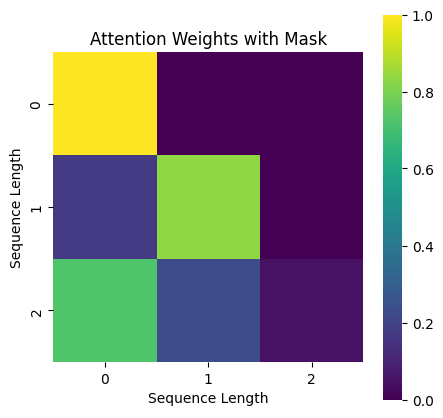

In [18]:
# Calculate the Energy matrix
Energy = np.dot(Q, K.T) / np.sqrt(embed_dim)

# Apply the mask to the Energy matrix
Energy = Energy + mask

# Find the softmax of the Energy matrix
# The cells with -inf will have 0 attention weight
Attention_Weights = np.exp(Energy) / np.sum(np.exp(Energy), axis=1, keepdims=True)

# Create a figure and subplot
fig, ax = plt.subplots(figsize=(5, 5))

# Set the x and y axis equal scales
ax.set_aspect('equal')

# Plot the Attention Weights matrix
sns.heatmap(Attention_Weights, cmap='viridis', ax=ax)
ax.set_title('Attention Weights with Mask')
ax.set_xlabel('Sequence Length')
ax.set_ylabel('Sequence Length')

# Display the plot
plt.show()

#### Attention Mask in the Encoder

In the context of Transformer models, the attention mask plays a crucial role in the encoder. The mask is used to prevent certain tokens from attending to others. This is particularly useful in scenarios where we have padding tokens in our input sequences.

In the provided code, we create a mask where the first token is masked and the second and third tokens are not masked. This is visualized in a heatmap where the masked positions are shown in a darker color.

The mask is then applied to the energy matrix, which is calculated as the dot product of the query and key matrices. The masked positions in the energy matrix are set to `-np.inf`.

When the softmax function is applied to the energy matrix to calculate the attention weights, the `-np.inf` values become 0. This effectively means that the masked positions do not contribute to the final attention output.

The attention weights are then visualized in a heatmap. The masked positions, which have 0 attention weight, are shown in a darker color.

This mechanism allows the model to ignore the padding tokens and focus on the meaningful tokens in the input sequence.

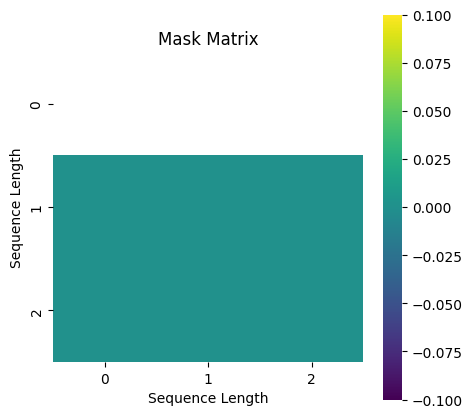

In [19]:
# Assume the sequence length is 3
seq_len = 3

# Create a mask matrix
# We mask the first token (index 0), and let the second and third token (index 1 and 2) be used
mask = np.ones((seq_len, seq_len)) * -np.inf
mask[1:, :] = 0

# Create a figure and subplot
fig, ax = plt.subplots(figsize=(5, 5))

# Set the x and y axis equal scales
ax.set_aspect('equal')

# Plot the mask matrix
sns.heatmap(mask, cmap='viridis', ax=ax)
ax.set_title('Mask Matrix')
ax.set_xlabel('Sequence Length')
ax.set_ylabel('Sequence Length')

# Display the plot
plt.show()

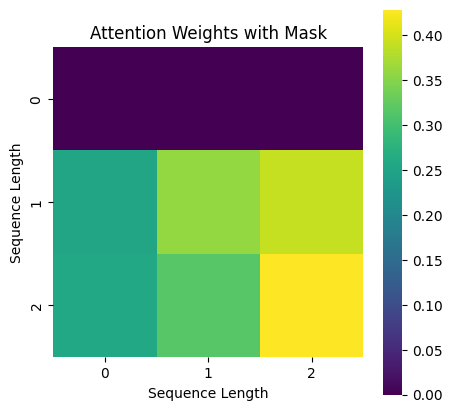

In [20]:
# Create random Q, K matrices
np.random.seed(0)
Q = np.random.rand(seq_len, embed_dim)
K = np.random.rand(seq_len, embed_dim)

# Calculate the Energy matrix
Energy = np.dot(Q, K.T) / np.sqrt(embed_dim)

# Apply the mask to the Energy matrix
Energy = Energy + mask

# Define a small epsilon to avoid division by zero
epsilon = 1e-9

# Find the softmax of the Energy matrix
# The cells with -inf will have 0 attention weight
# Add epsilon to the denominator to avoid division by zero
Attention_Weights = np.exp(Energy) / (np.sum(np.exp(Energy), axis=1, keepdims=True) + epsilon)

# Create a figure and subplot
fig, ax = plt.subplots(figsize=(5, 5))

# Set the x and y axis equal scales
ax.set_aspect('equal')

# Plot the Attention Weights matrix
sns.heatmap(Attention_Weights, cmap='viridis', ax=ax)
ax.set_title('Attention Weights with Mask')
ax.set_xlabel('Sequence Length')
ax.set_ylabel('Sequence Length')

# Display the plot
plt.show()

### Effect of Mask on Decoder's Self-Attention

The **mask** applied in the decoder's self-attention mechanism plays a crucial role in sequence-to-sequence tasks like machine translation. The mask ensures that while generating a particular output token in the sequence, the model only has access to the earlier positions in the output sequence.

When the mask is applied, the **attention weights** for the future tokens (those that the model should not have access to) become close to zero. This is because the mask adds a very large negative number to the future positions before the softmax operation, effectively nullifying their influence.

As a result, when the attention weights are used to compute the weighted sum of the value vectors, the contribution of the future tokens will be negligible. This aligns with our requirement that the prediction for a particular position should only depend on the known outputs at earlier positions, not on the future positions.

This mechanism is essential for making the model autoregressive, meaning it generates an output sequence one token at a time, using its own previous outputs as input for the next step.

### Multihead Attention

**Multihead Attention** is a key component of the Transformer model that allows the model to focus on different positions simultaneously. This is achieved by splitting the original embedding dimension into multiple "heads". 

In our case, we will split the embedding dimension of 3 into 2 heads, each with a size of 2. This means that for each position in the input sequence, we will have 2 different sets of Key, Query, and Value vectors, and consequently, 2 different attention outputs. These outputs are then concatenated and linearly transformed to result in the final output.

The advantage of Multihead Attention is that it allows the model to capture various aspects of the input. For example, one head might focus on syntactic information while another might focus on semantic information.

<div style="text-align: center">
    <img src="imgs/attention.webp" />
</div>

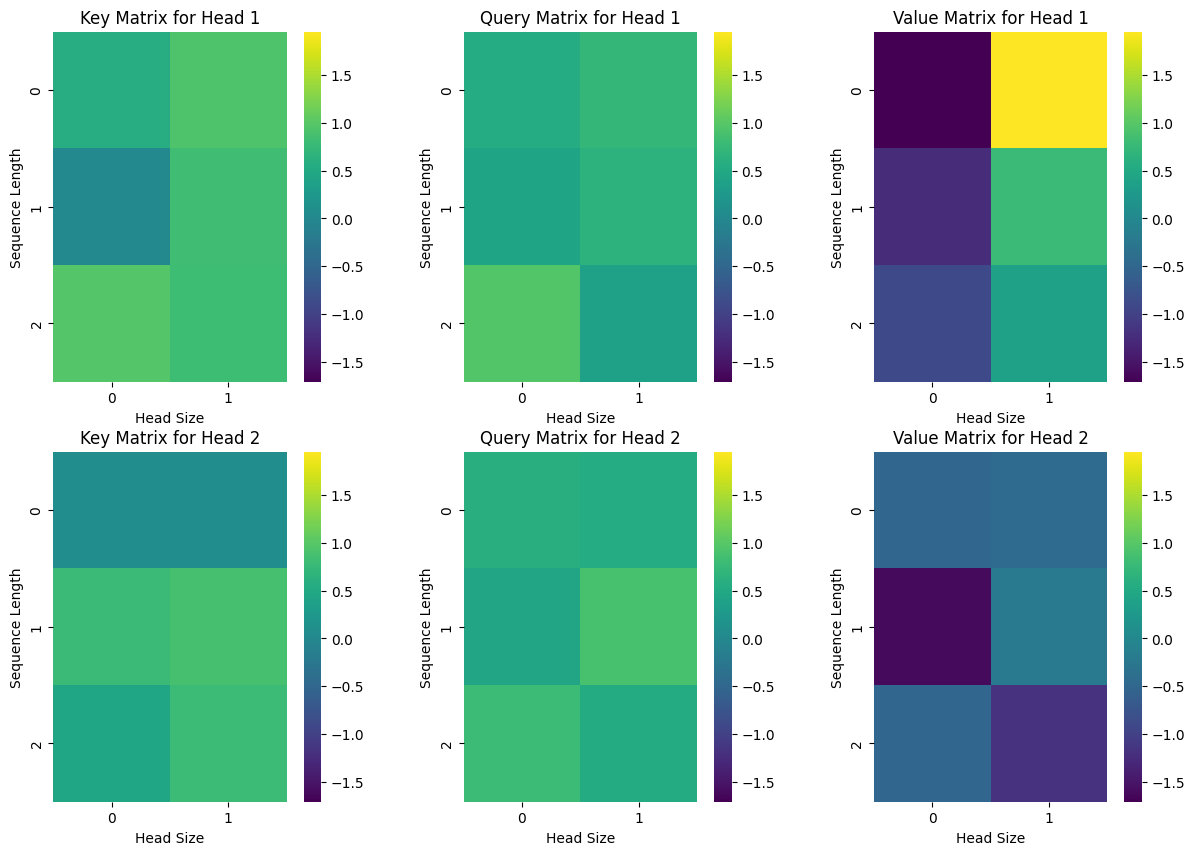

In [21]:
# Split the embedding dimension into 2 heads
head_size = embed_dim // 2

# Reshape the Key, Query, and Value matrices
K_head1, K_head2 = K[:, :head_size], K[:, head_size:]
Q_head1, Q_head2 = Q[:, :head_size], Q[:, head_size:]
V_head1, V_head2 = V[:, :head_size], V[:, head_size:]

# Find the min and max values for scaling
vmin = min(K_head1.min(), K_head2.min(), Q_head1.min(), Q_head2.min(), V_head1.min(), V_head2.min())
vmax = max(K_head1.max(), K_head2.max(), Q_head1.max(), Q_head2.max(), V_head1.max(), V_head2.max())

# Create a figure and subplots
fig, axs = plt.subplots(2, 3, figsize=(15, 10))

# Set the x and y axis equal scales
axs[0, 0].set_aspect('equal')
axs[0, 1].set_aspect('equal')
axs[0, 2].set_aspect('equal')
axs[1, 0].set_aspect('equal')
axs[1, 1].set_aspect('equal')
axs[1, 2].set_aspect('equal')

# Plot the Key matrices
sns.heatmap(K_head1, cmap='viridis', ax=axs[0, 0], vmin=vmin, vmax=vmax)
axs[0, 0].set_title('Key Matrix for Head 1')
axs[0, 0].set_xlabel('Head Size')
axs[0, 0].set_ylabel('Sequence Length')

sns.heatmap(K_head2, cmap='viridis', ax=axs[1, 0], vmin=vmin, vmax=vmax)
axs[1, 0].set_title('Key Matrix for Head 2')
axs[1, 0].set_xlabel('Head Size')
axs[1, 0].set_ylabel('Sequence Length')

# Plot the Query matrices
sns.heatmap(Q_head1, cmap='viridis', ax=axs[0, 1], vmin=vmin, vmax=vmax)
axs[0, 1].set_title('Query Matrix for Head 1')
axs[0, 1].set_xlabel('Head Size')
axs[0, 1].set_ylabel('Sequence Length')

sns.heatmap(Q_head2, cmap='viridis', ax=axs[1, 1], vmin=vmin, vmax=vmax)
axs[1, 1].set_title('Query Matrix for Head 2')
axs[1, 1].set_xlabel('Head Size')
axs[1, 1].set_ylabel('Sequence Length')

# Plot the Value matrices
sns.heatmap(V_head1, cmap='viridis', ax=axs[0, 2], vmin=vmin, vmax=vmax)
axs[0, 2].set_title('Value Matrix for Head 1')
axs[0, 2].set_xlabel('Head Size')
axs[0, 2].set_ylabel('Sequence Length')

sns.heatmap(V_head2, cmap='viridis', ax=axs[1, 2], vmin=vmin, vmax=vmax)
axs[1, 2].set_title('Value Matrix for Head 2')
axs[1, 2].set_xlabel('Head Size')
axs[1, 2].set_ylabel('Sequence Length')

# Display the plot
plt.show()

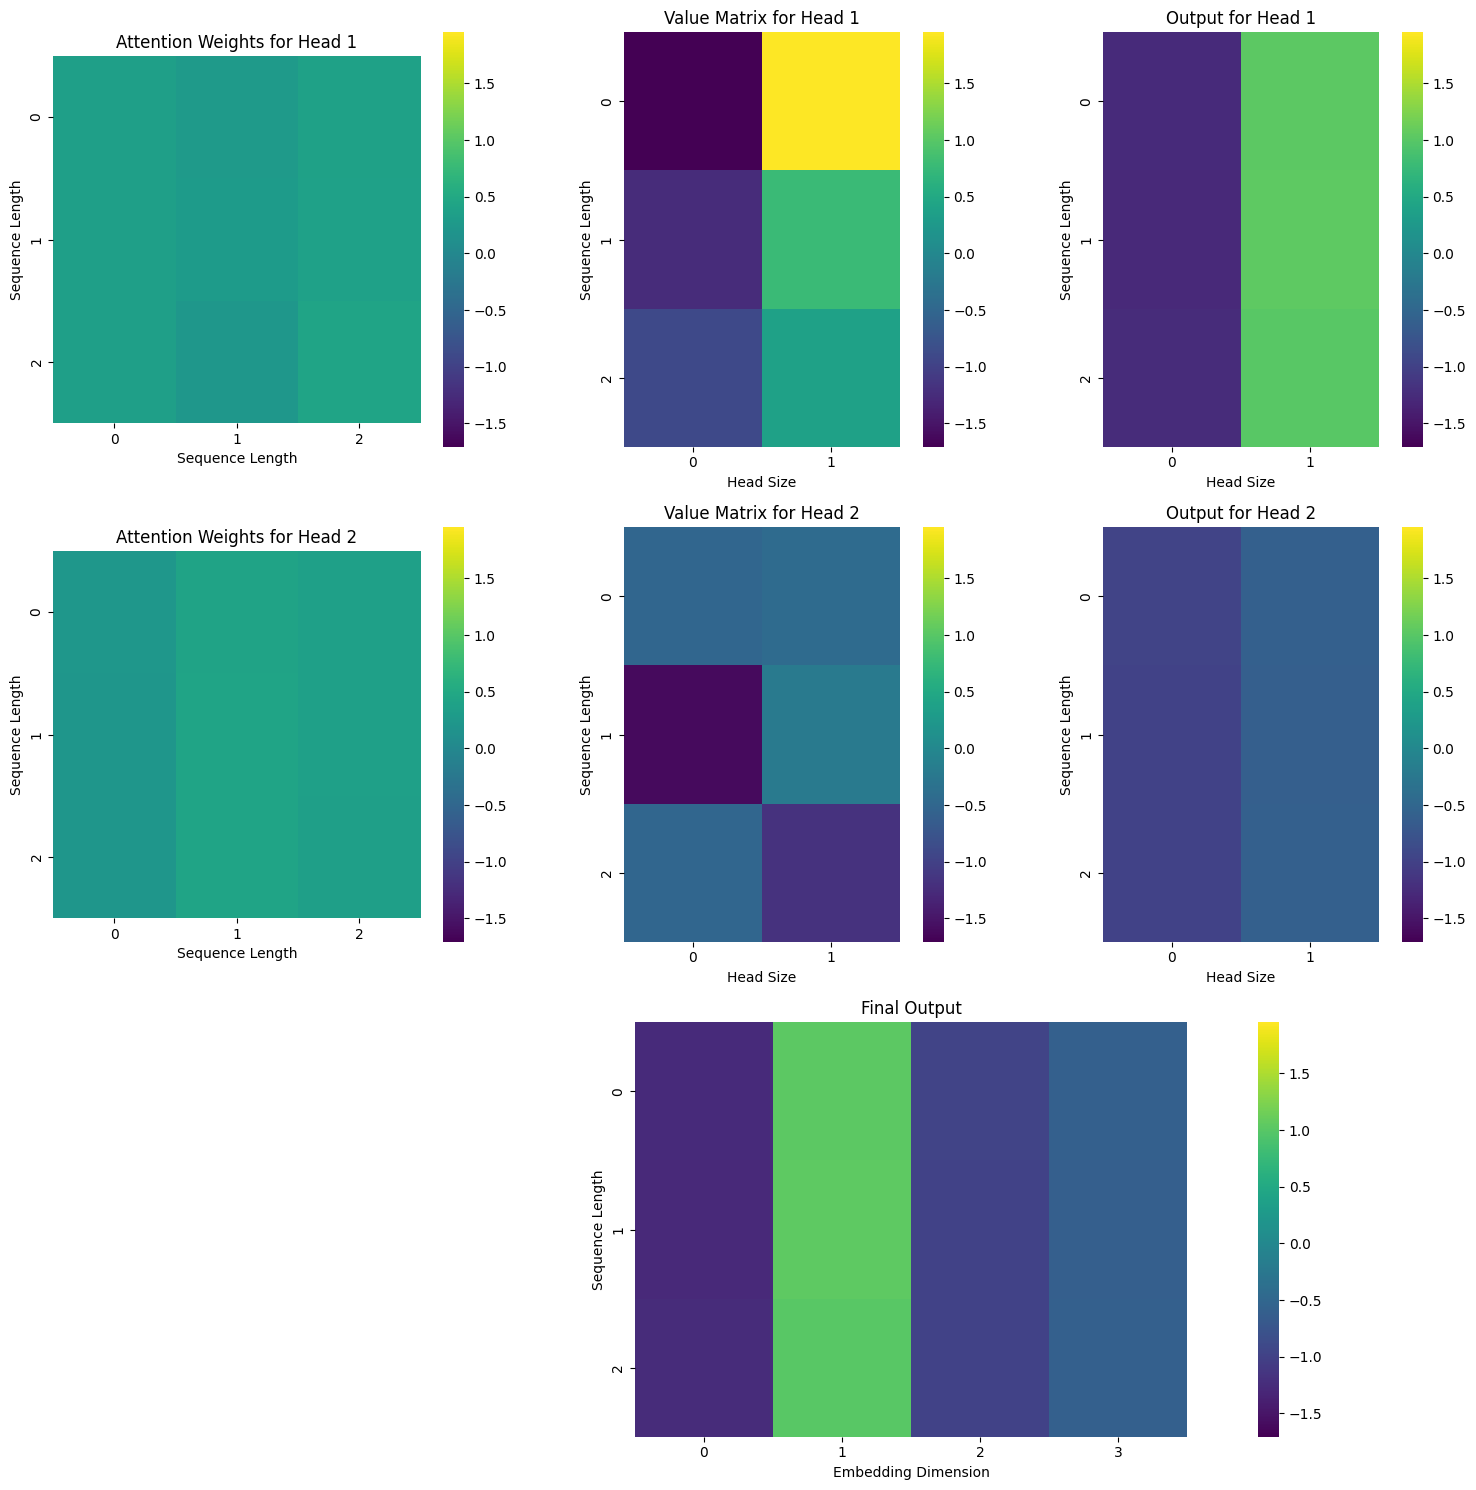

In [22]:
# Calculate the energy for each head
Energy_head1 = np.dot(Q_head1, K_head1.T) / np.sqrt(head_size)
Energy_head2 = np.dot(Q_head2, K_head2.T) / np.sqrt(head_size)

# Normalize the energy to get the attention weights
Attention_Weights_head1 = np.exp(Energy_head1) / np.sum(np.exp(Energy_head1), axis=1, keepdims=True)
Attention_Weights_head2 = np.exp(Energy_head2) / np.sum(np.exp(Energy_head2), axis=1, keepdims=True)

# Calculate the output for each head
Output_head1 = np.dot(Attention_Weights_head1, V_head1)
Output_head2 = np.dot(Attention_Weights_head2, V_head2)

# Concatenate the outputs
Output = np.concatenate([Output_head1, Output_head2], axis=1)

# Create a figure and subplots
fig = plt.figure(figsize=(15, 15))

# Define the color scale for all heatmaps
vmin = min(np.min(Attention_Weights_head1), np.min(Attention_Weights_head2), np.min(V_head1), np.min(V_head2), np.min(Output_head1), np.min(Output_head2), np.min(Output))
vmax = max(np.max(Attention_Weights_head1), np.max(Attention_Weights_head2), np.max(V_head1), np.max(V_head2), np.max(Output_head1), np.max(Output_head2), np.max(Output))

# Create subplots for the Attention Weights
ax1 = fig.add_subplot(331)
sns.heatmap(Attention_Weights_head1, cmap='viridis', ax=ax1, vmin=vmin, vmax=vmax)
ax1.set_title('Attention Weights for Head 1')
ax1.set_xlabel('Sequence Length')
ax1.set_ylabel('Sequence Length')

ax2 = fig.add_subplot(334)
sns.heatmap(Attention_Weights_head2, cmap='viridis', ax=ax2, vmin=vmin, vmax=vmax)
ax2.set_title('Attention Weights for Head 2')
ax2.set_xlabel('Sequence Length')
ax2.set_ylabel('Sequence Length')

# Create subplots for the Value matrices
ax3 = fig.add_subplot(332)
sns.heatmap(V_head1, cmap='viridis', ax=ax3, vmin=vmin, vmax=vmax)
ax3.set_title('Value Matrix for Head 1')
ax3.set_xlabel('Head Size')
ax3.set_ylabel('Sequence Length')

ax4 = fig.add_subplot(335)
sns.heatmap(V_head2, cmap='viridis', ax=ax4, vmin=vmin, vmax=vmax)
ax4.set_title('Value Matrix for Head 2')
ax4.set_xlabel('Head Size')
ax4.set_ylabel('Sequence Length')

# Create subplots for the Output matrices
ax5 = fig.add_subplot(333)
sns.heatmap(Output_head1, cmap='viridis', ax=ax5, vmin=vmin, vmax=vmax)
ax5.set_title('Output for Head 1')
ax5.set_xlabel('Head Size')
ax5.set_ylabel('Sequence Length')

ax6 = fig.add_subplot(336)
sns.heatmap(Output_head2, cmap='viridis', ax=ax6, vmin=vmin, vmax=vmax)
ax6.set_title('Output for Head 2')
ax6.set_xlabel('Head Size')
ax6.set_ylabel('Sequence Length')

# Create a subplot for the final Output matrix
ax7 = fig.add_subplot(313)
sns.heatmap(Output, cmap='viridis', ax=ax7, vmin=vmin, vmax=vmax)
ax7.set_title('Final Output')
ax7.set_xlabel('Embedding Dimension')
ax7.set_ylabel('Sequence Length')

# Set x and y axis equal scales
ax1.set_aspect('equal')
ax2.set_aspect('equal')
ax3.set_aspect('equal')
ax4.set_aspect('equal')
ax5.set_aspect('equal')
ax6.set_aspect('equal')
ax7.set_aspect('equal')

# Display the plot
plt.tight_layout()
plt.show()

### Fully Connected Layer in Multihead Attention

After the **Multihead Attention** operation, the outputs from each head are concatenated and passed through a **Fully Connected (or Dense) layer**. This layer is a linear transformation that operates on the concatenated output.

The purpose of this step is:

**Feature Integration**: Each head in the multihead attention might learn to focus on different aspects of the input. The fully connected layer integrates the different learned features from each head into a unified representation.

This final step is crucial for effectively leveraging the multihead attention mechanism in Transformer models. It ensures that the model can make use of the diverse set of features captured by each attention head.

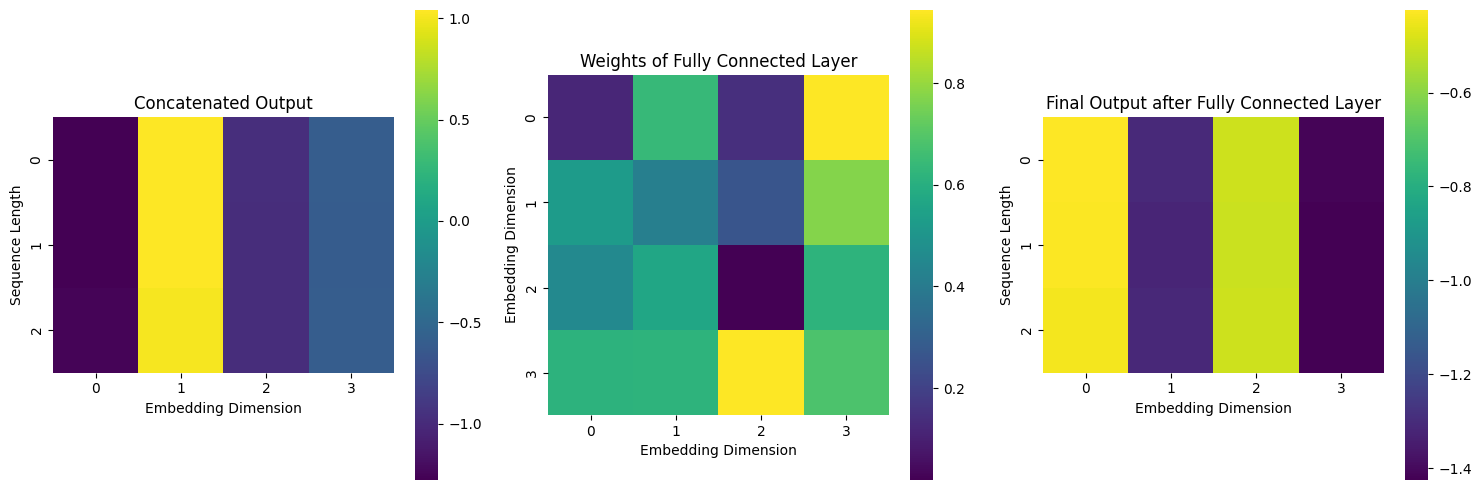

In [23]:
# Concatenate the outputs of the two heads
Concatenated_Output = np.concatenate((Output_head1, Output_head2), axis=1)

# Define the weights for the fully connected layer
FC_Weights = np.random.rand(embed_dim, embed_dim)

# Apply the fully connected layer
Final_Output = np.dot(Concatenated_Output, FC_Weights)

# Create a figure and subplots
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Set x and y axis equal scales
axs[0].set_aspect('equal')
axs[1].set_aspect('equal')
axs[2].set_aspect('equal')

# Plot the Concatenated Output matrix
sns.heatmap(Concatenated_Output, cmap='viridis', ax=axs[0])
axs[0].set_title('Concatenated Output')
axs[0].set_xlabel('Embedding Dimension')
axs[0].set_ylabel('Sequence Length')

# Plot the Weights of the fully connected layer
sns.heatmap(FC_Weights, cmap='viridis', ax=axs[1])
axs[1].set_title('Weights of Fully Connected Layer')
axs[1].set_xlabel('Embedding Dimension')
axs[1].set_ylabel('Embedding Dimension')

# Plot the Final Output matrix
sns.heatmap(Final_Output, cmap='viridis', ax=axs[2])
axs[2].set_title('Final Output after Fully Connected Layer')
axs[2].set_xlabel('Embedding Dimension')
axs[2].set_ylabel('Sequence Length')

# Display the plot
plt.tight_layout()
plt.show()

### Summary of Multihead Attention Demonstration

This demonstration walked through the steps of the **Multihead Attention** mechanism, a key component of Transformer models used in many natural language processing tasks. Here's a summary of each step and its purpose:

1. **Embedding**: The input sequence is transformed into continuous vectors, or embeddings. This allows the model to learn a rich representation of the input data.

2. **Splitting into Heads**: The embedding dimension is split into multiple heads. Each head will independently learn to focus on different aspects of the input.

3. **Key, Query, and Value Matrices**: For each head, the embeddings are transformed into Key, Query, and Value matrices. These matrices are used to calculate the attention weights and the output of each head.

4. **Scaled Dot-Product Attention**: The attention weights are calculated as the softmax of the dot product of the Query and Key matrices, scaled by the square root of the head size. These weights determine how much each element in the sequence contributes to the output.

5. **Masking**: In the decoder, a mask is applied to the attention weights to prevent the model from attending to future positions in the sequence. This ensures that the prediction for a particular position is only based on known outputs.

6. **Weighted Sum of Values**: The output of each head is calculated as the dot product of the attention weights and the Value matrix. This results in a weighted sum of the value vectors, where the weights represent the relevance of each element in the sequence.

7. **Concatenation**: The outputs from each head are concatenated along the embedding dimension. This combines the information learned by each head.

8. **Fully Connected Layer**: Finally, a fully connected layer is applied to the concatenated output. This integrates the different learned features from each head into a unified representation, which is used in subsequent layers of the model.

This step-by-step process allows the model to focus on different parts of the input sequence when producing each element in the output sequence, hence the term "attention". It's a way for the model to aggregate information from all parts of the input, weighted by their relevance.